In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16


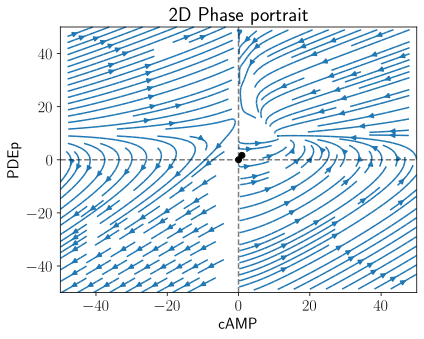

In [7]:
# credit goes to http://www.facweb.iitkgp.ac.in/~adityab/files/lec18.html

import numpy as np
import matplotlib.pyplot as plt


# interesting bifurcation values at k1 = 4.5 -> stable spiral at 0.8 stable node
k1 = 9.18
#k3 = 0.12
k3 = 1.97
k2 = 0.7
r1 = 2.04
r2 = 9.34
r3 = 0.56
r4 = 1.84
Km1 = 0.46
Km2 = 9.34
Km3 = 1.26
Km4 = 0.18
Dt = 1.26
ACt = 10
PDEt = 9.66
Et = 2.04

def G(u, v, J, K):
    numerator = 2 * u * K
    den_1 = v - u + v * J + u * K
    den_2 = -4 * (v - u) * u * K
    radicand = den_1**2 + den_2
    denominator = den_1 + np.sqrt(radicand)
    return numerator / denominator

def dPDEp(cAMP, PDEp):
    return r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)

def dcAMP(cAMP, PDEp, ACp):
    return (k1 * ACp) - (k3 + k2 * PDEp) * cAMP

cAMP_range = np.linspace(-50, 50, 50)
PDEp_range = np.linspace(-50, 50, 50)

CAMP, PDEP = np.meshgrid(cAMP_range, PDEp_range)

ACp = ACt * G(r1 * CAMP, r2 * Dt, Km1 / ACt, Km2 / ACt)

U = dcAMP(CAMP, PDEP, ACp)
V = dPDEp(CAMP, PDEP)
plt.streamplot(CAMP, PDEP, U, V, integration_direction='forward', density=1.5)

plt.scatter(0, 0, color='black', marker='o', label='(0,0) Saddle', alpha=1, zorder=10)
plt.scatter(0.951867, 1.65682, color='black', marker='o', label='(0.95,1.62) Unstable spiral', zorder=10)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title('2D Phase portrait')
plt.xlabel('cAMP')
plt.ylabel('PDEp')
plt.show()

In [ ]:
# credit goes to http://www.facweb.iitkgp.ac.in/~adityab/files/lec18.html